In [1]:
%matplotlib inline


# Nearest Neighbors Classification


Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.



Automatically created module for IPython interactive environment


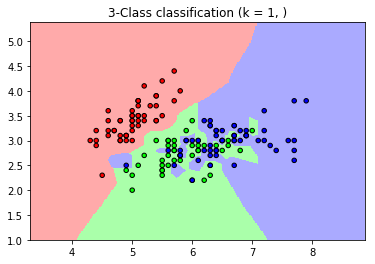

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

n_neighbors = 1

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#==================================================================
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)
#==================================================================

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, )"
              % (len(clf.classes_), n_neighbors,))

plt.show()

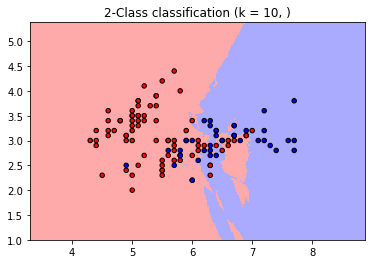

In [3]:
n_neighbors = 10
test_frac = 0.2

#iris = datasets.load_iris()
y = np.copy(iris.target)
#==================================================================
y[y==0]=1 # force into a 2 class problem
#==================================================================

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac, random_state=42)

#==================================================================
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)
#==================================================================

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, )"
              % (len(clf.classes_), n_neighbors,))

plt.show()

classification accuracy = 0.800


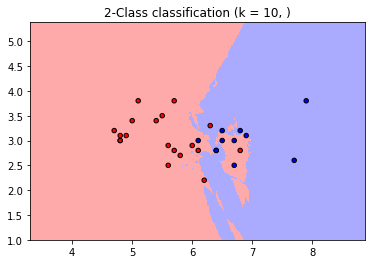

In [4]:
# TEST DATA
Acc = accuracy_score(y_test, clf.predict(X_test))
print( "classification accuracy = %.3f"%(Acc, ) )
# Put the result into a color plot
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, )"
              % (len(clf.classes_), n_neighbors, ))

plt.show()

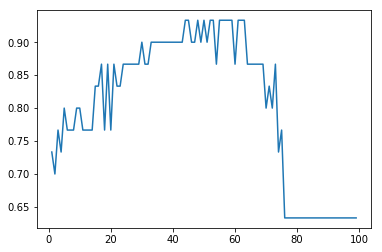

In [5]:
acc_list = []

nmax = 100
for n_neighbors in range(1,nmax):
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)
    acc_list.append(accuracy_score(y_test, clf.predict(X_test)))

plt.plot(range(1,nmax), acc_list)